In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
# Hyperparameter
batch_size = 32

In [5]:
# Dataset and Dataloader
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                         shuffle=True, num_workers=2)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


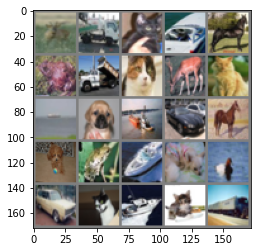

deer  truck cat   ship  horse frog  truck cat   deer  cat   ship  dog   ship  car   horse dog   frog  ship  dog   bird  car   cat   ship  cat   truck


In [7]:
# Plot
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
  imgs = imgs / 2+0.5 # unnormalize
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs, (1,2,0)))
  plt.show()

# one batch of random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(25)))


In [16]:
# Model
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64,64,3)
    self.fc1 = nn.Linear(64*4*4, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x
  
  # it is more flexibility with the object-oriented opproach.


model = ConvNet().to(device)

In [17]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [19]:
# Training
steps_per_epoch = len(trainloader)
for epoch in range(10):
  running_loss = 0.0
  for (inputs, labels) in trainloader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    # forward + loss
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # backward + optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f'[{epoch}+1] loss: {running_loss / steps_per_epoch:.3f}')
print('Finished Training')

[0+1] loss: 1.473
[1+1] loss: 1.112
[2+1] loss: 0.938
[3+1] loss: 0.833
[4+1] loss: 0.759
[5+1] loss: 0.702
[6+1] loss: 0.651
[7+1] loss: 0.609
[8+1] loss: 0.567
[9+1] loss: 0.535
Finished Training


In [25]:
# Evaluation

n_correct = 0
n_total = 0

model.eval()

with torch.no_grad():
  for (images, labels) in testloader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)

    # take class with highest value as predicition
    _, predicted = torch.max(outputs.data, 1)

    n_total += labels.size(0)
    n_correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {n_correct / n_total:3f}')

Accuracy on test set: 0.741400
